DATA PREP

In [18]:
path = 'archive/individual_stocks_5yr/individual_stocks_5yr/AAL_data.csv'

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv(path)

df.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
df['daily_return'] = df['close'].pct_change() * 100

df['sma_10'] = df['close'].rolling(window=10).mean()
df['sma_20'] = df['close'].rolling(window=20).mean()
df['ema_10'] = df['close'].ewm(span=10, adjust=False).mean()
df['ema_20'] = df['close'].ewm(span=20, adjust=False).mean()

df['volatility_10'] = df['daily_return'].rolling(window=10).std()
df['volatility_20'] = df['daily_return'].rolling(window=20).std()

delta = df['close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['rsi'] = 100 - (100 / (1 + rs))

df['upper_band'] = df['sma_20'] + (df['close'].rolling(window=20).std() * 2)
df['lower_band'] = df['sma_20'] - (df['close'].rolling(window=20).std() * 2)

df['macd'] = df['ema_10'] - df['ema_20']

df['momentum'] = df['close'] - df['close'].shift(4)
df['roc'] = df['close'].pct_change(periods=5) * 100  
df['obv'] = (np.sign(df['close'].diff()) * df['volume']).cumsum()  

df['log_return'] = np.log(df['close'] / df['close'].shift(1))

df.dropna(inplace=True)

df.head()


,date,open,high,low,close,volume,Name,daily_return,sma_10,sma_20,...,volatility_10,volatility_20,rsi,upper_band,lower_band,macd,momentum,roc,obv,log_return
20,2013-03-11,14.85,15.15,14.71,15.13,6961800,AAL,1.407507,14.110,14.0265,...,0.957837,2.733913,61.357702,15.284791,12.768209,0.138025,1.08,8.848921,47831900.0,0.013977
21,2013-03-12,15.14,15.60,14.95,15.50,8999100,AAL,2.445473,14.334,14.0785,...,0.998667,2.731027,83.180428,15.488976,12.668024,0.221672,0.93,10.320285,56831000.0,0.024160
22,2013-03-13,15.54,16.20,15.48,15.91,11380000,AAL,2.645161,14.584,14.1605,...,1.037491,2.744930,84.890110,15.791328,12.529672,0.315253,1.09,9.196980,68211000.0,0.026108
23,2013-03-14,15.98,16.36,15.93,16.25,8383300,AAL,2.137021,14.866,14.2400,...,0.879594,2.723499,85.449735,16.110727,12.369273,0.408505,1.33,9.649123,76594300.0,0.021145
24,2013-03-15,16.45,16.54,15.88,15.98,17667700,AAL,-1.661538,15.103,14.3395,...,1.437579,2.504418,92.285714,16.359937,12.319063,0.447085,0.85,7.104558,58926600.0,-0.016755


In [5]:
from sklearn.preprocessing import StandardScaler

features = ['open', 'high', 'low', 'close', 'volume', 'daily_return', 'sma_10', 'sma_20', 
            'ema_10', 'ema_20', 'volatility_10', 'volatility_20', 'rsi', 'upper_band', 
            'lower_band', 'macd', 'momentum', 'roc', 'obv', 'log_return']

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

df[features].head()


,open,high,low,close,volume,daily_return,sma_10,sma_20,ema_10,ema_20,volatility_10,volatility_20,rsi,upper_band,lower_band,macd,momentum,roc,obv,log_return
20,-2.257077,-2.261225,-2.242789,-2.233856,-0.348208,0.573416,-2.315740,-2.306484,-2.296555,-2.298129,-1.463840,0.952238,0.409654,-2.326664,-2.250949,-0.030081,0.522920,1.540211,-1.996419,0.579452
21,-2.229727,-2.219183,-2.219888,-2.198918,-0.053570,1.037477,-2.294602,-2.301580,-2.277317,-2.286790,-1.410635,0.947560,1.604515,-2.308553,-2.260890,0.079605,0.441392,1.816813,-1.957914,1.034115
22,-2.192003,-2.163126,-2.169317,-2.160202,0.290760,1.126755,-2.271011,-2.293847,-2.254522,-2.272829,-1.360045,0.970093,1.698125,-2.281734,-2.274619,0.202316,0.528356,1.605642,-1.909223,1.121056
23,-2.150507,-2.148177,-2.126379,-2.128097,-0.142628,0.899572,-2.244400,-2.286350,-2.230021,-2.257128,-1.565796,0.935360,1.728767,-2.253403,-2.290535,0.324596,0.658801,1.690641,-1.873353,0.899486
24,-2.106182,-2.131360,-2.131150,-2.153592,1.200098,-0.798713,-2.222036,-2.276966,-2.214621,-2.245360,-0.838699,0.580279,2.103057,-2.231298,-2.295517,0.375186,0.397911,1.212287,-1.948948,-0.792627


In [6]:
df = df.drop(columns=['Name', 'date'], errors='ignore')

window_size = 20
X = []

for i in range(len(df) - window_size + 1):
    X.append(df[features].iloc[i:i + window_size].values)

X = np.array(X)

X.shape


(1220, 20, 20)

In [7]:
from sklearn.manifold import TSNE

X_flat = X.reshape(X.shape[0], -1) 
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X_flat)


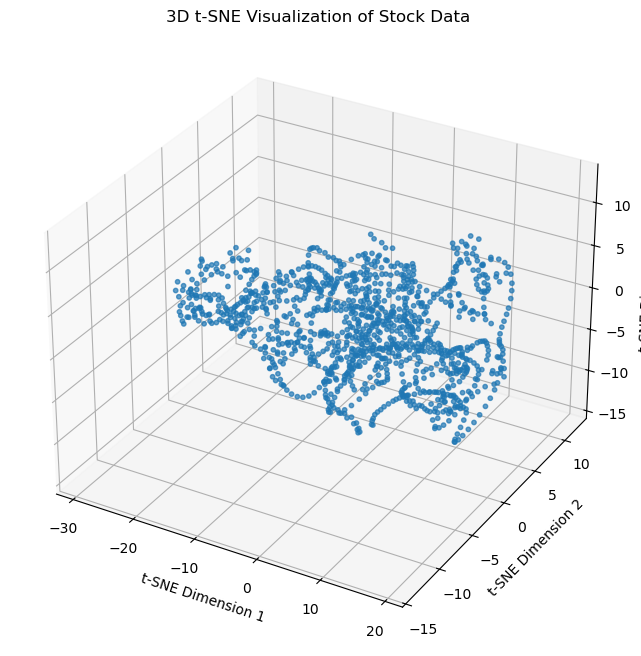

In [8]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Apply t-SNE with 3 components
tsne = TSNE(n_components=3)
X_tsne_3d = tsne.fit_transform(X_flat)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], s=10, alpha=0.7)
ax.set_title("3D t-SNE Visualization of Stock Data")
ax.set_xlabel("t-SNE Dimension 1")
ax.set_ylabel("t-SNE Dimension 2")
ax.set_zlabel("t-SNE Dimension 3")
plt.show()



In [9]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=3)
X_isomap = isomap.fit_transform(X_flat)

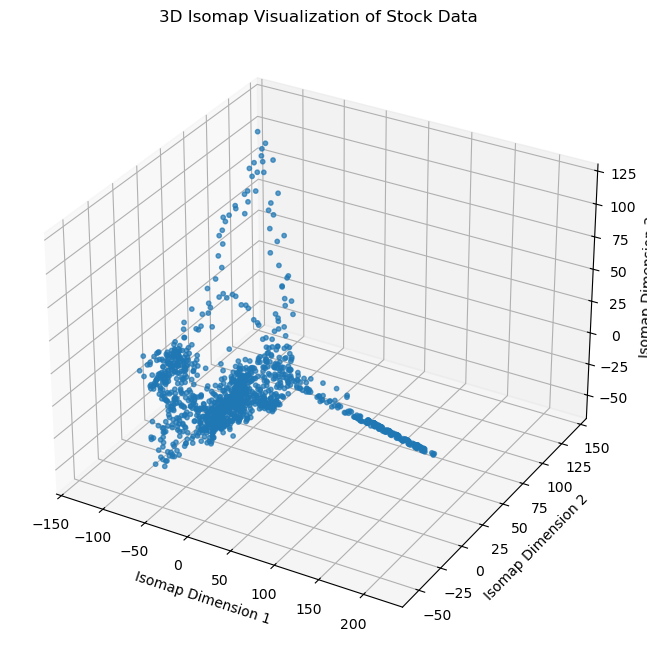

In [10]:
from sklearn.manifold import Isomap
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Apply Isomap with 3 components
isomap = Isomap(n_components=3)
X_isomap_3d = isomap.fit_transform(X_flat)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_isomap_3d[:, 0], X_isomap_3d[:, 1], X_isomap_3d[:, 2], s=10, alpha=0.7)
ax.set_title("3D Isomap Visualization of Stock Data")
ax.set_xlabel("Isomap Dimension 1")
ax.set_ylabel("Isomap Dimension 2")
ax.set_zlabel("Isomap Dimension 3")
plt.show()


In [11]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=3, n_neighbors=10)
X_lle = lle.fit_transform(X_flat)

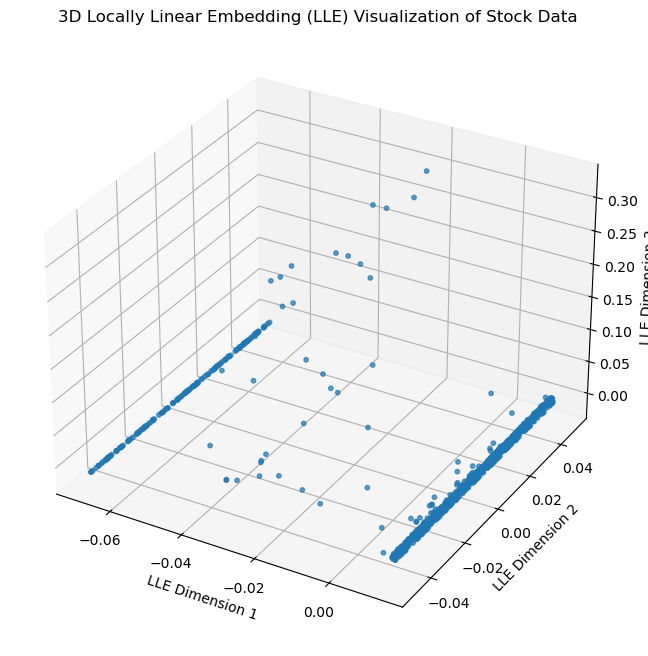

In [12]:
from sklearn.manifold import LocallyLinearEmbedding
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Apply LLE with 3 components
lle = LocallyLinearEmbedding(n_components=3, n_neighbors=10)
X_lle_3d = lle.fit_transform(X_flat)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_lle_3d[:, 0], X_lle_3d[:, 1], X_lle_3d[:, 2], s=10, alpha=0.7)
ax.set_title("3D Locally Linear Embedding (LLE) Visualization of Stock Data")
ax.set_xlabel("LLE Dimension 1")
ax.set_ylabel("LLE Dimension 2")
ax.set_zlabel("LLE Dimension 3")
plt.show()


In [13]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Use k-means clustering on the embedding results
kmeans = KMeans(n_clusters=5)  # Choose a suitable number of clusters
labels_tsne = kmeans.fit_predict(X_tsne)
labels_isomap = kmeans.fit_predict(X_isomap)
labels_lle = kmeans.fit_predict(X_lle)

# Calculate Silhouette Score for each
tsne_score = silhouette_score(X_tsne, labels_tsne)
isomap_score = silhouette_score(X_isomap, labels_isomap)
lle_score = silhouette_score(X_lle, labels_lle)

print("Silhouette Scores:")
print("t-SNE:", tsne_score)
print("Isomap:", isomap_score)
print("LLE:", lle_score)


Silhouette Scores:
t-SNE: 0.3518924
Isomap: 0.4711658996331694
LLE: 0.5901311421725831


from sklearn.manifold import trustworthiness

# Calculate Trustworthiness for each method
tsne_trust = trustworthiness(X_flat, X_tsne)
isomap_trust = trustworthiness(X_flat, X_isomap)
lle_trust = trustworthiness(X_flat, X_lle)

print("Trustworthiness:")
print("t-SNE:", tsne_trust)
print("Isomap:", isomap_trust)
print("LLE:", lle_trust)


/opt/homebrew/Caskroom/mambaforge/base/lib/python3.10/site-packages/gudhi/persistence_graphical_tools.py:107: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


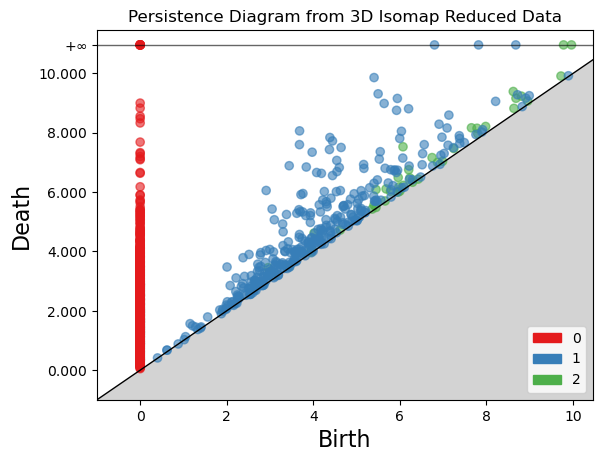

Betti Numbers: β₀ = 7, β₁ = 3, β₂ = 2


In [15]:
import numpy as np
import gudhi
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt


isomap = Isomap(n_neighbors=15, n_components=3)  # Adjust the number of neighbors as necessary
X_isomap_3d = isomap.fit_transform(X_flat)

max_edge_length = 10  # Adjust this value to connect more points
rips_complex = gudhi.RipsComplex(points=X_isomap_3d, max_edge_length=max_edge_length)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)  # Check for higher dimensions

persistence_diagram = simplex_tree.persistence()

gudhi.plot_persistence_diagram(persistence_diagram)
plt.title("Persistence Diagram from 3D Isomap Reduced Data")
plt.show()

betti_numbers = simplex_tree.betti_numbers()
print(f'Betti Numbers: β₀ = {betti_numbers[0]}, β₁ = {betti_numbers[1]}, β₂ = {betti_numbers[2]}')




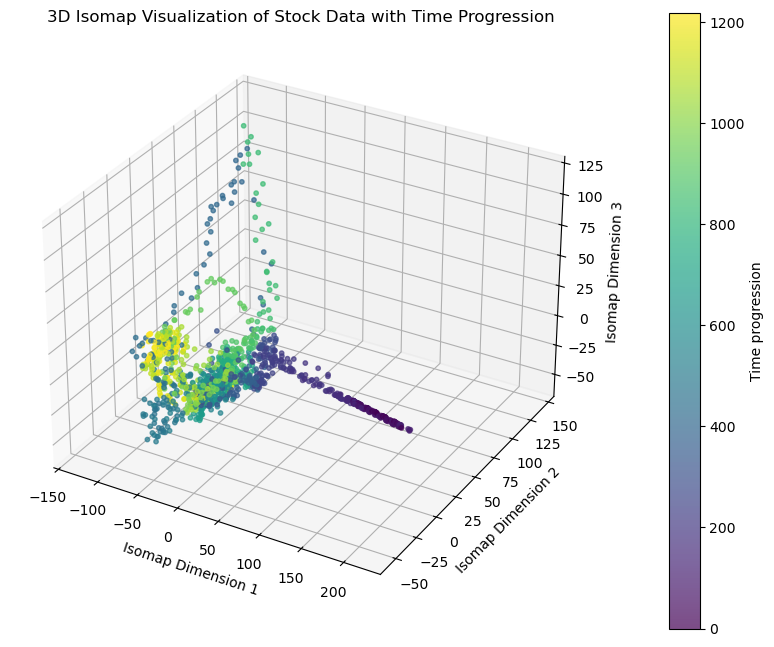

In [16]:
from sklearn.manifold import Isomap
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Apply Isomap with 3 components
isomap = Isomap(n_components=3)
X_isomap_3d = isomap.fit_transform(X_flat)

# Create a time-based color gradient
time = np.arange(X_isomap_3d.shape[0])  # Assuming each row represents a time step
colors = plt.cm.viridis(time / time.max())  # Normalize time to [0, 1] and map to 'viridis' color

# Create a 3D scatter plot with color gradient
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_isomap_3d[:, 0], X_isomap_3d[:, 1], X_isomap_3d[:, 2], c=time, cmap='viridis', s=10, alpha=0.7)

# Add color bar to indicate time progression
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label("Time progression")

# Set plot labels and title
ax.set_title("3D Isomap Visualization of Stock Data with Time Progression")
ax.set_xlabel("Isomap Dimension 1")
ax.set_ylabel("Isomap Dimension 2")
ax.set_zlabel("Isomap Dimension 3")
plt.show()


Epoch 1/200, Loss: 4.0078
Epoch 2/200, Loss: 0.5575
Epoch 3/200, Loss: 0.4790
Epoch 4/200, Loss: 0.4451
Epoch 5/200, Loss: 0.4224
Epoch 6/200, Loss: 0.4109
Epoch 7/200, Loss: 0.4004
Epoch 8/200, Loss: 0.3954
Epoch 9/200, Loss: 0.3971
Epoch 10/200, Loss: 0.3899
Epoch 11/200, Loss: 0.3831
Epoch 12/200, Loss: 0.3836
Epoch 13/200, Loss: 0.3797
Epoch 14/200, Loss: 0.3780
Epoch 15/200, Loss: 0.3757
Epoch 16/200, Loss: 0.3770
Epoch 17/200, Loss: 0.3781
Epoch 18/200, Loss: 0.3728
Epoch 19/200, Loss: 0.3719
Epoch 20/200, Loss: 0.3719
Epoch 21/200, Loss: 0.3701
Epoch 22/200, Loss: 0.3675
Epoch 23/200, Loss: 0.3682
Epoch 24/200, Loss: 0.3651
Epoch 25/200, Loss: 0.3631
Epoch 26/200, Loss: 0.3654
Epoch 27/200, Loss: 0.3633
Epoch 28/200, Loss: 0.3641
Epoch 29/200, Loss: 0.3603
Epoch 30/200, Loss: 0.3604
Epoch 31/200, Loss: 0.3613
Epoch 32/200, Loss: 0.3586
Epoch 33/200, Loss: 0.3587
Epoch 34/200, Loss: 0.3548
Epoch 35/200, Loss: 0.3551
Epoch 36/200, Loss: 0.3553
Epoch 37/200, Loss: 0.3582
Epoch 38/2

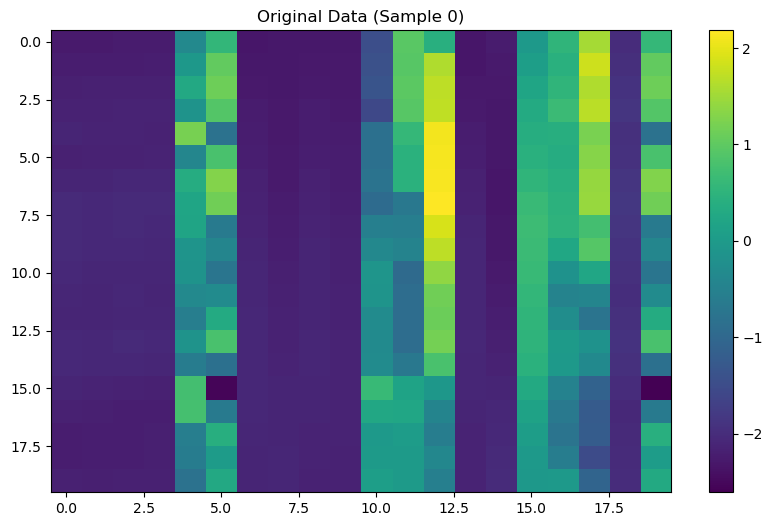

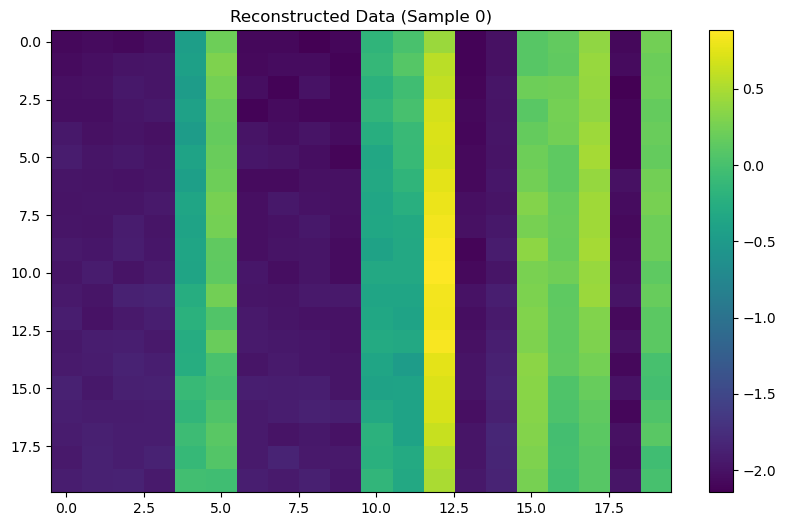

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Step 1: Prepare Data
X_reduced_tensor = torch.tensor(X_isomap_3d, dtype=torch.float32)  # 3D embeddings
X_tensor = torch.tensor(X_flat, dtype=torch.float32)  # Flattened 400D data

# Create a PyTorch dataset and data loader
dataset = TensorDataset(X_reduced_tensor, X_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Step 2: Define the Reconstruction Model
class ReconstructionNet(nn.Module):
    def __init__(self):
        super(ReconstructionNet, self).__init__()
        self.encoder_to_decoder = nn.Sequential(
            nn.Linear(3, 64),   # From 3D to a higher-dimensional representation
            nn.ReLU(),
            nn.Linear(64, 128), # Further expand dimensions
            nn.ReLU(),
            nn.Linear(128, 400) # Output matches flattened input (400 = 20 x 20)
        )
    
    def forward(self, x):
        return self.encoder_to_decoder(x)

# Instantiate the model
model = ReconstructionNet()

# Step 3: Define Loss Function and Optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Train the Model
epochs = 200
model.train()
for epoch in range(epochs):
    epoch_loss = 0.0
    for batch_X_reduced, batch_X in dataloader:
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(batch_X_reduced)
        
        # Compute loss
        loss = criterion(outputs, batch_X)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Accumulate batch loss
        epoch_loss += loss.item() * batch_X_reduced.size(0)
    
    # Calculate average loss for the epoch
    epoch_loss /= len(dataset)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}")

# Step 5: Reconstruct Data
model.eval()
with torch.no_grad():
    X_reconstructed_flat = model(X_reduced_tensor).numpy()  # Shape: (1220, 400)

# Reshape to the original 3D shape
X_reconstructed = X_reconstructed_flat.reshape(-1, 20, 20)  # Shape: (1220, 20, 20)

# Step 6: Evaluate Reconstruction
reconstruction_error = ((X - X_reconstructed) ** 2).mean(axis=(1, 2))
print(f"Average Reconstruction Error: {reconstruction_error.mean():.4f}")

# Optional Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.imshow(X[0], aspect='auto', cmap='viridis')
plt.title("Original Data (Sample 0)")
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.imshow(X_reconstructed[0], aspect='auto', cmap='viridis')
plt.title("Reconstructed Data (Sample 0)")
plt.colorbar()
plt.show()


Reconstruction Metrics:
Mean Squared Error (MSE): 0.2423
Mean Absolute Error (MAE): 0.2967
R-squared (R²): 0.7569


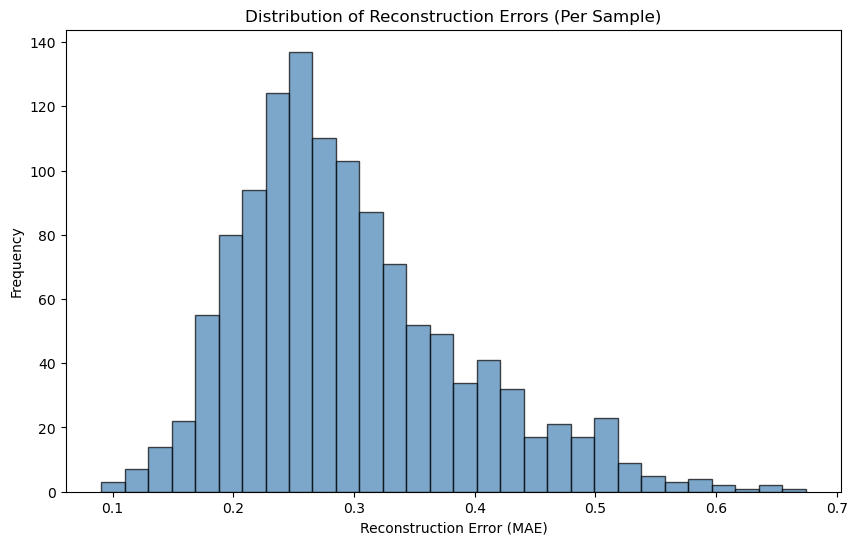

In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Step 6: Evaluate Reconstruction
model.eval()
with torch.no_grad():
    X_reconstructed_flat = model(X_reduced_tensor).numpy()  # Shape: (1220, 400)

# Reshape to the original 3D shape
X_reconstructed = X_reconstructed_flat.reshape(-1, 20, 20)  # Shape: (1220, 20, 20)

# Compute reconstruction metrics
# Flatten original and reconstructed data for metric calculations
X_flat_original = X.reshape(X.shape[0], -1)  # Shape: (1220, 400)
X_flat_reconstructed = X_reconstructed.reshape(X_reconstructed.shape[0], -1)  # Shape: (1220, 400)

# Mean Squared Error (already computed as loss, but printing here for clarity)
mse = mean_squared_error(X_flat_original, X_flat_reconstructed)

# Mean Absolute Error
mae = mean_absolute_error(X_flat_original, X_flat_reconstructed)

# R-squared
r2 = r2_score(X_flat_original, X_flat_reconstructed)

# Print the metrics
print(f"Reconstruction Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Optional: Plot error distribution
errors = np.abs(X_flat_original - X_flat_reconstructed).mean(axis=1)  # Per-sample MAE
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
plt.title("Distribution of Reconstruction Errors (Per Sample)")
plt.xlabel("Reconstruction Error (MAE)")
plt.ylabel("Frequency")
plt.show()


In [22]:
class DeeperReconstructionNet(nn.Module):
    def __init__(self):
        super(DeeperReconstructionNet, self).__init__()
        self.encoder_to_decoder = nn.Sequential(
            nn.Linear(3, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 400)
        )
    
    def forward(self, x):
        return self.encoder_to_decoder(x)

# Instantiate the deeper model
deeper_model = DeeperReconstructionNet()

# Use the same training procedure as before
criterion = nn.MSELoss()
optimizer = optim.Adam(deeper_model.parameters(), lr=0.001)
epochs = 200

# Training loop remains the same
deeper_model.train()
for epoch in range(epochs):
    epoch_loss = 0.0
    for batch_X_reduced, batch_X in dataloader:
        optimizer.zero_grad()
        outputs = deeper_model(batch_X_reduced)
        loss = criterion(outputs, batch_X)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * batch_X_reduced.size(0)
    epoch_loss /= len(dataset)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/200, Loss: 0.6530
Epoch 2/200, Loss: 0.4059
Epoch 3/200, Loss: 0.3956
Epoch 4/200, Loss: 0.3807
Epoch 5/200, Loss: 0.3747
Epoch 6/200, Loss: 0.3737
Epoch 7/200, Loss: 0.3658
Epoch 8/200, Loss: 0.3603
Epoch 9/200, Loss: 0.3587
Epoch 10/200, Loss: 0.3616
Epoch 11/200, Loss: 0.3603
Epoch 12/200, Loss: 0.3563
Epoch 13/200, Loss: 0.3491
Epoch 14/200, Loss: 0.3474
Epoch 15/200, Loss: 0.3473
Epoch 16/200, Loss: 0.3391
Epoch 17/200, Loss: 0.3392
Epoch 18/200, Loss: 0.3393
Epoch 19/200, Loss: 0.3378
Epoch 20/200, Loss: 0.3399
Epoch 21/200, Loss: 0.3331
Epoch 22/200, Loss: 0.3309
Epoch 23/200, Loss: 0.3318
Epoch 24/200, Loss: 0.3356
Epoch 25/200, Loss: 0.3299
Epoch 26/200, Loss: 0.3271
Epoch 27/200, Loss: 0.3245
Epoch 28/200, Loss: 0.3256
Epoch 29/200, Loss: 0.3223
Epoch 30/200, Loss: 0.3237
Epoch 31/200, Loss: 0.3196
Epoch 32/200, Loss: 0.3201
Epoch 33/200, Loss: 0.3289
Epoch 34/200, Loss: 0.3170
Epoch 35/200, Loss: 0.3218
Epoch 36/200, Loss: 0.3149
Epoch 37/200, Loss: 0.3140
Epoch 38/2

Reconstruction Metrics:
Mean Squared Error (MSE): 0.2955
Mean Absolute Error (MAE): 0.3341
R-squared (R²): 0.7034


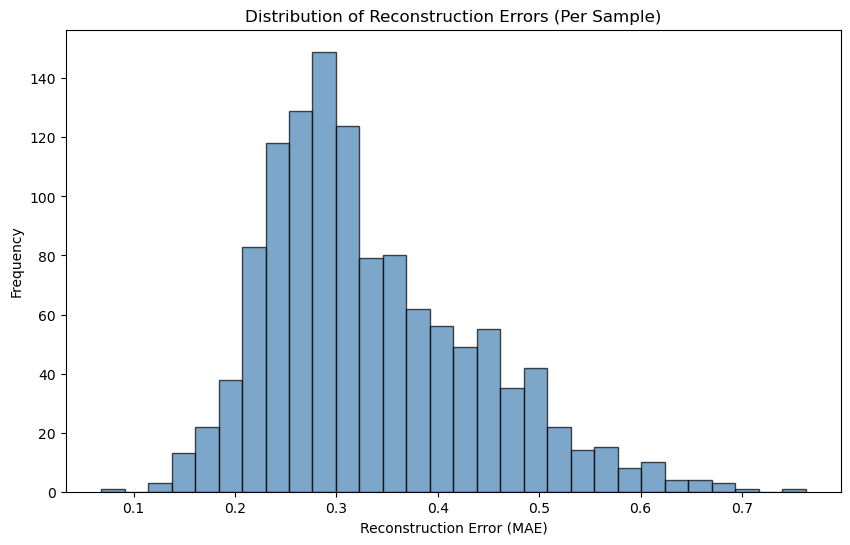

In [23]:
# Step 6: Evaluate Reconstruction
model.eval()
with torch.no_grad():
    X_reconstructed_flat = model(X_reduced_tensor).numpy()  # Shape: (1220, 400)

# Reshape to the original 3D shape
X_reconstructed = X_reconstructed_flat.reshape(-1, 20, 20)  # Shape: (1220, 20, 20)

# Compute reconstruction metrics
# Flatten original and reconstructed data for metric calculations
X_flat_original = X.reshape(X.shape[0], -1)  # Shape: (1220, 400)
X_flat_reconstructed = X_reconstructed.reshape(X_reconstructed.shape[0], -1)  # Shape: (1220, 400)

# Mean Squared Error (already computed as loss, but printing here for clarity)
mse = mean_squared_error(X_flat_original, X_flat_reconstructed)

# Mean Absolute Error
mae = mean_absolute_error(X_flat_original, X_flat_reconstructed)

# R-squared
r2 = r2_score(X_flat_original, X_flat_reconstructed)

# Print the metrics
print(f"Reconstruction Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Optional: Plot error distribution
errors = np.abs(X_flat_original - X_flat_reconstructed).mean(axis=1)  # Per-sample MAE
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
plt.title("Distribution of Reconstruction Errors (Per Sample)")
plt.xlabel("Reconstruction Error (MAE)")
plt.ylabel("Frequency")
plt.show()

In [25]:
# CNN-Based Reconstruction Model
class CNNReconstructionNet(nn.Module):
    def __init__(self):
        super(CNNReconstructionNet, self).__init__()
        # Encoder: Fully Connected Layers
        self.encoder = nn.Sequential(
            nn.Linear(3, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU()
        )
        
        # Decoder: Deconvolutional Layers
        self.decoder = nn.Sequential(
            nn.Linear(256, 20 * 20),  # Transform to a feature map size
            nn.ReLU(),
            nn.Unflatten(1, (1, 20, 20)),  # Reshape into 2D (1 channel, 20x20)
            nn.ConvTranspose2d(1, 16, kernel_size=3, stride=1, padding=1),  # Upscale
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=1, padding=1),  # Final output
            nn.Sigmoid()  # Ensure values are between 0 and 1
        )
    
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Instantiate the model
model = CNNReconstructionNet()

# Adjust the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training remains mostly the same, but you'll need to reshape the target to match (batch_size, 1, 20, 20)
for epoch in range(epochs):
    epoch_loss = 0.0
    for batch_X_reduced, batch_X in dataloader:
        batch_X = batch_X.view(-1, 1, 20, 20)  # Reshape flattened data into 20x20
        optimizer.zero_grad()
        outputs = model(batch_X_reduced)
        loss = criterion(outputs, batch_X)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item() * batch_X_reduced.size(0)
    epoch_loss /= len(dataset)
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss:.4f}")


Epoch 1/200, Loss: 0.9400
Epoch 2/200, Loss: 0.8404
Epoch 3/200, Loss: 0.8038
Epoch 4/200, Loss: 0.7943
Epoch 5/200, Loss: 0.7899
Epoch 6/200, Loss: 0.7868
Epoch 7/200, Loss: 0.7846
Epoch 8/200, Loss: 0.7823
Epoch 9/200, Loss: 0.7775
Epoch 10/200, Loss: 0.7744
Epoch 11/200, Loss: 0.7720
Epoch 12/200, Loss: 0.7702
Epoch 13/200, Loss: 0.7685
Epoch 14/200, Loss: 0.7683
Epoch 15/200, Loss: 0.7685
Epoch 16/200, Loss: 0.7654
Epoch 17/200, Loss: 0.7641
Epoch 18/200, Loss: 0.7631
Epoch 19/200, Loss: 0.7632
Epoch 20/200, Loss: 0.7612
Epoch 21/200, Loss: 0.7624
Epoch 22/200, Loss: 0.7602
Epoch 23/200, Loss: 0.7586
Epoch 24/200, Loss: 0.7583
Epoch 25/200, Loss: 0.7593
Epoch 26/200, Loss: 0.7573
Epoch 27/200, Loss: 0.7561
Epoch 28/200, Loss: 0.7562
Epoch 29/200, Loss: 0.7566
Epoch 30/200, Loss: 0.7557
Epoch 31/200, Loss: 0.7556
Epoch 32/200, Loss: 0.7538
Epoch 33/200, Loss: 0.7544
Epoch 34/200, Loss: 0.7528
Epoch 35/200, Loss: 0.7553
Epoch 36/200, Loss: 0.7540
Epoch 37/200, Loss: 0.7521
Epoch 38/2

Reconstruction Metrics:
Mean Squared Error (MSE): 0.7193
Mean Absolute Error (MAE): 0.5588
R-squared (R²): 0.2666


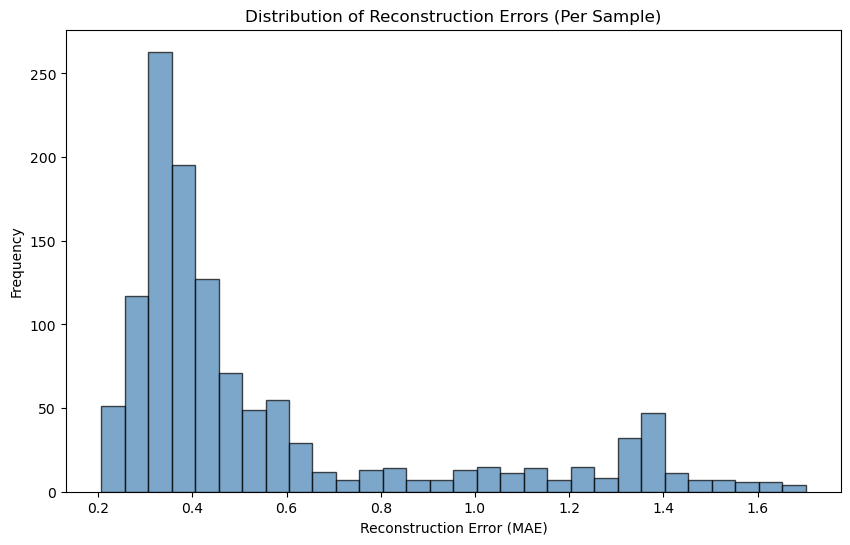

In [26]:
# Step 6: Evaluate Reconstruction
model.eval()
with torch.no_grad():
    X_reconstructed_flat = model(X_reduced_tensor).numpy()  # Shape: (1220, 400)

# Reshape to the original 3D shape
X_reconstructed = X_reconstructed_flat.reshape(-1, 20, 20)  # Shape: (1220, 20, 20)

# Compute reconstruction metrics
# Flatten original and reconstructed data for metric calculations
X_flat_original = X.reshape(X.shape[0], -1)  # Shape: (1220, 400)
X_flat_reconstructed = X_reconstructed.reshape(X_reconstructed.shape[0], -1)  # Shape: (1220, 400)

# Mean Squared Error (already computed as loss, but printing here for clarity)
mse = mean_squared_error(X_flat_original, X_flat_reconstructed)

# Mean Absolute Error
mae = mean_absolute_error(X_flat_original, X_flat_reconstructed)

# R-squared
r2 = r2_score(X_flat_original, X_flat_reconstructed)

# Print the metrics
print(f"Reconstruction Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Optional: Plot error distribution
errors = np.abs(X_flat_original - X_flat_reconstructed).mean(axis=1)  # Per-sample MAE
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=30, alpha=0.7, color='steelblue', edgecolor='black')
plt.title("Distribution of Reconstruction Errors (Per Sample)")
plt.xlabel("Reconstruction Error (MAE)")
plt.ylabel("Frequency")
plt.show()